Number of anomalies detected: 5000


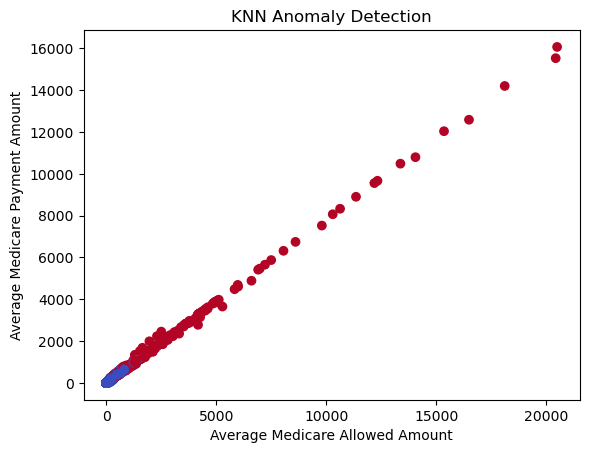

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('Healthcare Providers.csv')
df = pd.DataFrame(data)

# Remove commas and convert columns to numeric
df['Number of Medicare Beneficiaries'] = pd.to_numeric(df['Number of Medicare Beneficiaries'].str.replace(',', ''), errors='coerce')
df['Average Medicare Allowed Amount'] = pd.to_numeric(df['Average Medicare Allowed Amount'].str.replace(',', ''), errors='coerce')
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'].str.replace(',', ''), errors='coerce')

# Remove rows where conversion resulted in NaN
df = df.dropna(subset=['Number of Medicare Beneficiaries', 'Average Medicare Allowed Amount', 'Average Medicare Payment Amount'])

# Filter out rows where 'Number of Medicare Beneficiaries' is zero
df = df[df['Number of Medicare Beneficiaries'] > 0]

# Encode 'Gender of the Provider' for KNN
label_encoder = LabelEncoder()
df['Gender Encoded'] = label_encoder.fit_transform(df['Gender of the Provider'])

# Define the features (X)
X = df[['Average Medicare Allowed Amount', 'Number of Medicare Beneficiaries', 'Gender Encoded']]  # Features

# Feature scaling (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the NearestNeighbors object for KNN anomaly detection
knn = NearestNeighbors(n_neighbors=5)  # Set k to 5
knn.fit(X_scaled)

# Compute the distances to the k-nearest neighbors
distances, indices = knn.kneighbors(X_scaled)

# The anomaly score for each point is the distance to its k-th nearest neighbor
anomaly_scores = distances.mean(axis=1)

# Set a threshold to classify points as anomalies (e.g., top 5% of points with highest distance)
threshold = np.percentile(anomaly_scores, 95)  # Top 5% anomalies
anomalies = anomaly_scores > threshold

# Add a column in the dataframe to flag anomalies
df['Anomaly'] = anomalies

# Print number of anomalies detected
print(f'Number of anomalies detected: {sum(anomalies)}')

# Plot anomalies vs non-anomalies
plt.scatter(df['Average Medicare Allowed Amount'], df['Average Medicare Payment Amount'], c=anomalies, cmap='coolwarm')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.title('KNN Anomaly Detection')
plt.show()
